<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">PROJECT: GLASS IDENTIFICATION REPORT</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">BATCH NUMBER : DS2309</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">NAME: ABHISHEK AGNIHOTRI</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOADING DATASET</span>

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">ADDING FEATURE NAME IN DATASET</span>

In [3]:
columns= ['ID', 'RI', 'NA', 'MG', 'AL', 'Si','K', 'Ca','Ba', 'Fe', 'TypeOfGlass']
df.columns=columns
df

,ID,RI,NA,MG,AL,Si,K,Ca,Ba,Fe,TypeOfGlass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Top Five Sample of DATASET</span>

In [4]:
df.head(5)

,ID,RI,NA,MG,AL,Si,K,Ca,Ba,Fe,TypeOfGlass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Bottom Five Sample of DATASET</span>

In [5]:
df.tail(5)

,ID,RI,NA,MG,AL,Si,K,Ca,Ba,Fe,TypeOfGlass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">BASIC INFO LIKE DATATYPES OF DATASET</span>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           214 non-null    int64  
 1   RI           214 non-null    float64
 2   NA           214 non-null    float64
 3   MG           214 non-null    float64
 4   AL           214 non-null    float64
 5   Si           214 non-null    float64
 6   K            214 non-null    float64
 7   Ca           214 non-null    float64
 8   Ba           214 non-null    float64
 9   Fe           214 non-null    float64
 10  TypeOfGlass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">IDENTIFIFCATION OF NULL VALUE COUNTS of DATASET</span>

In [7]:
df.isnull().value_counts()

ID     RI     NA     MG     AL     Si     K      Ca     Ba     Fe     TypeOfGlass
False  False  False  False  False  False  False  False  False  False  False          214
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           214 non-null    int64  
 1   RI           214 non-null    float64
 2   NA           214 non-null    float64
 3   MG           214 non-null    float64
 4   AL           214 non-null    float64
 5   Si           214 non-null    float64
 6   K            214 non-null    float64
 7   Ca           214 non-null    float64
 8   Ba           214 non-null    float64
 9   Fe           214 non-null    float64
 10  TypeOfGlass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DETERMINATION OF NUMBERS OF ROWS & COLUMNS of DATASET</span>

In [9]:
df.shape

(214, 11)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CORRELATION & VISUALIZATION OF RAW DATASET</span>

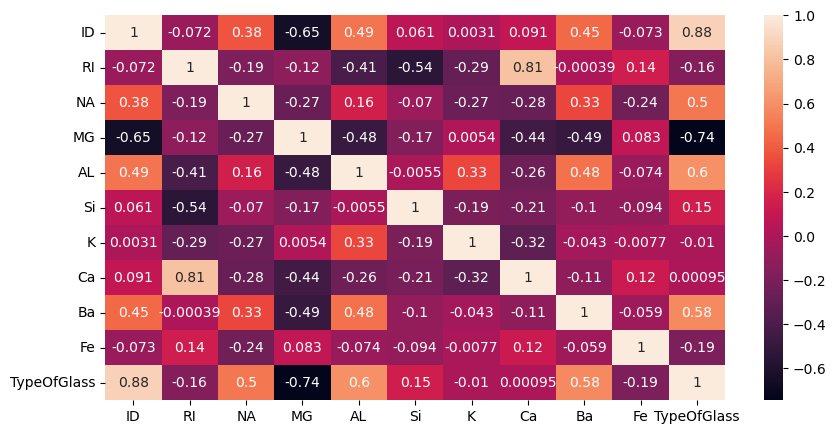

In [10]:
plt.figure(figsize=(10,5), facecolor='white')
sns.heatmap(df.corr(), annot=True)
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DROPPING OF ID AND TARGET COLUMNS AND STORED IN df1</span>

In [11]:
columns_drop=['ID','TypeOfGlass']
df1=df.drop(columns=columns_drop)
df1

,RI,NA,MG,AL,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CORRELATION VISULAIZATION BETWEEN INPUTS ONLY OF df1</span>

<span style="color:Blue;font-size: 15px;font-family: verdana;font-weight: bold ">AFTER DROPPING ID AND TARGET VALUE FROM MAIN DF</span>

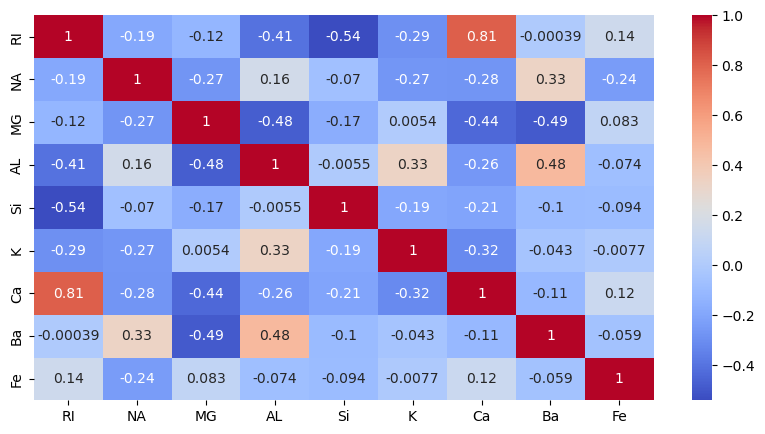

In [12]:
plt.figure(figsize=(10,5), facecolor='white')
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
df1.corr()

,RI,NA,MG,AL,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
NA,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
MG,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
AL,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DISTRIBUTION PLOTS:CHECKING SKEWNESS</span>

In [14]:
df.skew()

ID             0.000000
RI             1.625431
NA             0.454181
MG            -1.152559
AL             0.907290
Si            -0.730447
K              6.551648
Ca             2.047054
Ba             3.416425
Fe             1.754327
TypeOfGlass    1.114915
dtype: float64

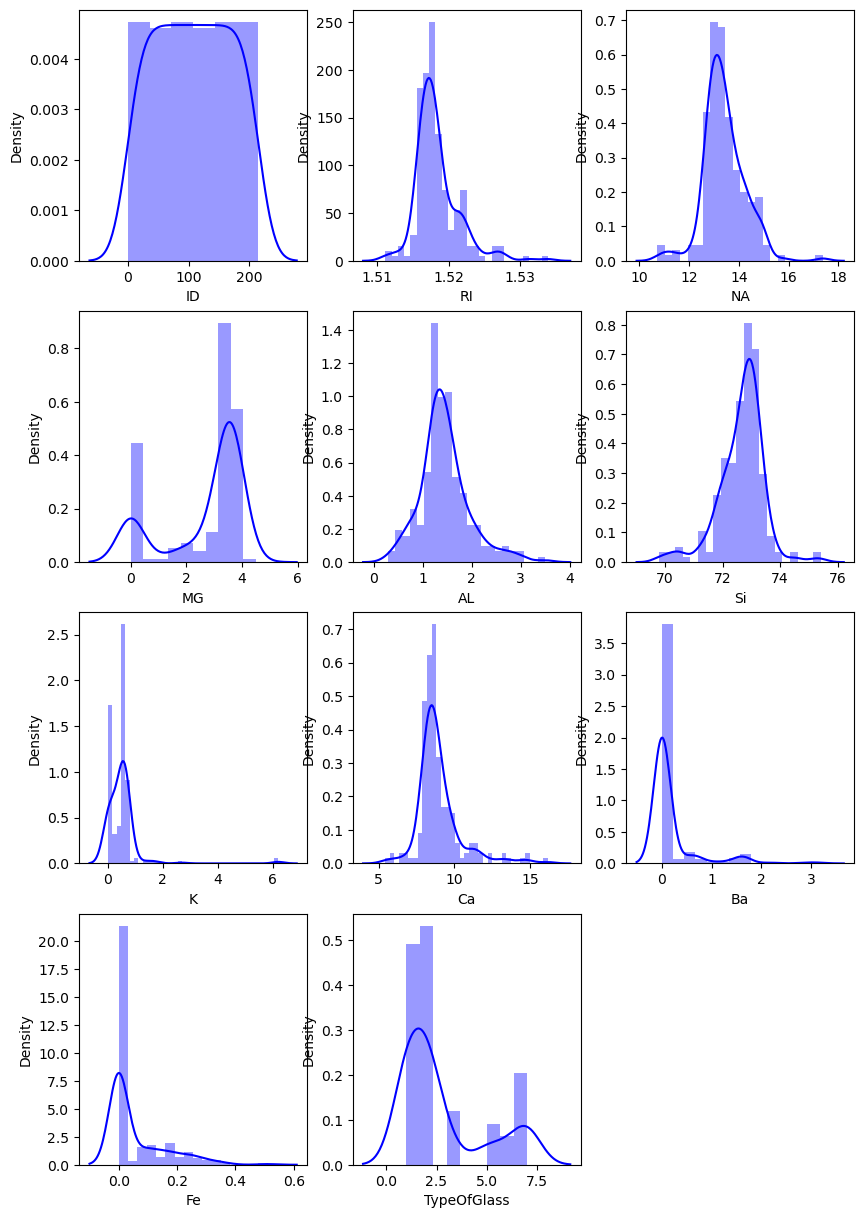

In [15]:
plt.figure(figsize=(10,15), facecolor='white')
plots=1
for i in df.columns: 
    if plots <12:
        ax=plt.subplot(4,3,plots)
        sns.distplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
    plots+=1
plt.show()


<span style="color:magenta;font-size: 22px;font-family: verdana;font-weight: bold ">NEED TO CORRECT SKEWNESS OF K, Ca, & Ba</span>

In [16]:
df['K']=np.sqrt(df['K'])

In [17]:
df['Ca']=np.sqrt(df['Ca'])

In [18]:
df['Ba']=np.sqrt(df['Ba'])

In [19]:
df.skew()

ID             0.000000
RI             1.625431
NA             0.454181
MG            -1.152559
AL             0.907290
Si            -0.730447
K              0.871221
Ca             1.572031
Ba             2.377201
Fe             1.754327
TypeOfGlass    1.114915
dtype: float64

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">DISTRIBUTION PLOTS:AFTER CORRECTION OF SKEWNESS</span>

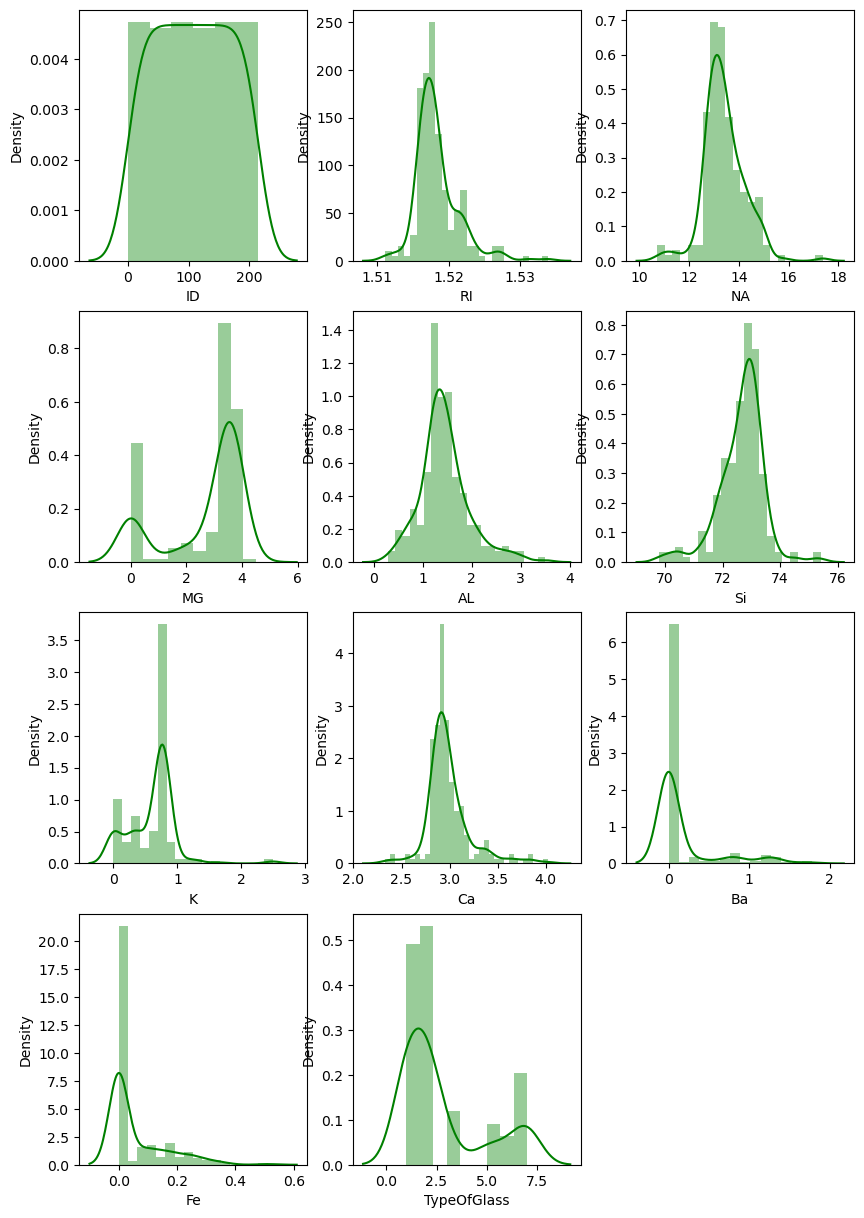

In [20]:
plt.figure(figsize=(10,15), facecolor='white')
plots=1
for i in df.columns: 
    if plots <12:
        ax=plt.subplot(4,3,plots)
        sns.distplot(df[i], color='g')
        plt.xlabel(i, fontsize=10)
    plots+=1
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">BOX PLOTS:CHECKING OUTLIERS</span>

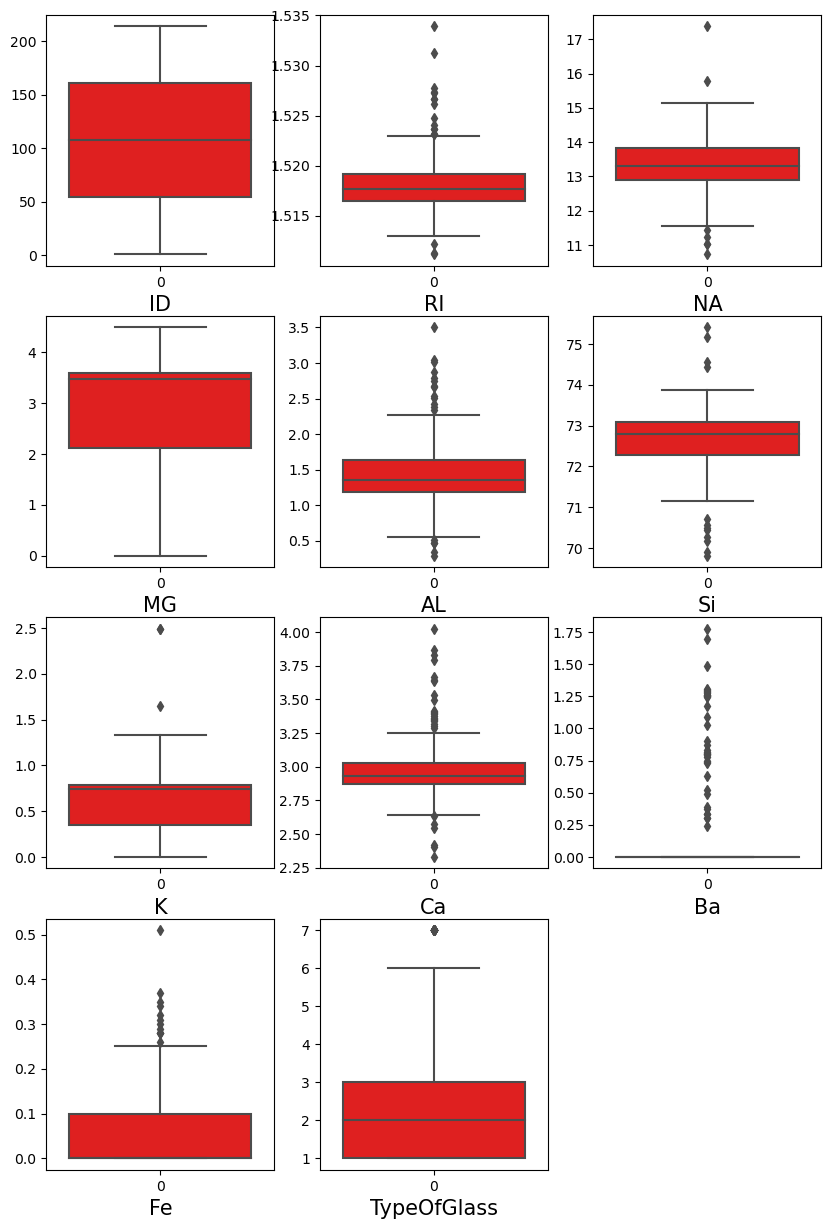

In [21]:
plt.figure(figsize=(10,15), facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<12:
        ax=plt.subplot(4,3,plotnum)
        sns.boxplot(df[i], color='red')
        plt.xlabel(i, fontsize=15)
    plotnum+=1
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">STATISTICAL DESCRIPTION OF DATASET</span>

In [22]:
df.describe()

,ID,RI,NA,MG,AL,Si,K,Ca,Ba,Fe,TypeOfGlass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.604720,2.984419,0.161251,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.363300,0.224598,0.386969,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,2.330236,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.349946,2.870540,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.744976,2.932576,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.781025,3.028613,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,2.491987,4.023680,1.774824,0.510000,7.000000


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">INFORMATION GIVEN:</span>

Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">TARGET VARIABLE OR TypeOfGlass DIVIDED INTO 2 TYPES

<span style="color:magenta;font-size: 22px;font-family: verdana;font-weight: bold ">WG:WINDOW TYPE GLASS [WG] & NWG: NON WINDOW TYPE GLASS</SPAN>

In [23]:
df['TypeOfGlass'] = df['TypeOfGlass'].astype(str)  # Convert to string 


In [24]:
mapping={'1':'WG','2':'WG','3':'WG','4':'WG','5':'NWG','6':'NWG','7':'NWG'}
df['TypeOfGlass']=df['TypeOfGlass'].replace(mapping)
df

,ID,RI,NA,MG,AL,Si,K,Ca,Ba,Fe,TypeOfGlass
0,1,1.52101,13.64,4.49,1.10,71.78,0.244949,2.958040,0.000000,0.0,WG
1,2,1.51761,13.89,3.60,1.36,72.73,0.692820,2.798214,0.000000,0.0,WG
2,3,1.51618,13.53,3.55,1.54,72.99,0.624500,2.789265,0.000000,0.0,WG
3,4,1.51766,13.21,3.69,1.29,72.61,0.754983,2.867054,0.000000,0.0,WG
4,5,1.51742,13.27,3.62,1.24,73.08,0.741620,2.840775,0.000000,0.0,WG
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.282843,3.029851,1.029563,0.0,NWG
210,211,1.51685,14.92,0.00,1.99,73.06,0.000000,2.898275,1.260952,0.0,NWG
211,212,1.52065,14.36,0.00,2.02,73.42,0.000000,2.905168,1.280625,0.0,NWG
212,213,1.51651,14.38,0.00,1.94,73.61,0.000000,2.912044,1.252996,0.0,NWG


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION:CHECKING OF NULL OR MISSING VALUES</span>

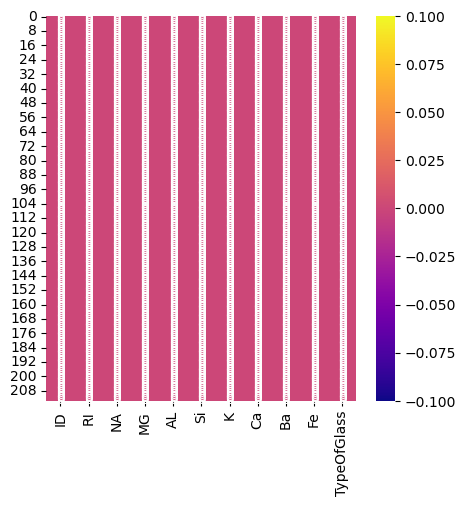

In [25]:
plt.figure(figsize=(5,5), facecolor='white')
sns.heatmap(df.isnull(), annot=True, cmap="plasma")
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">TARGET VARIABLE OR TypeOfGlass DIVIDED INTO 2 TYPES

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">One-Hot Encoding Process:TARGET VARIABLE OR TypeOfGlass DIVIDED INTO 2 TYPES: 0 and 1 </span>

In [26]:
df_encode=pd.get_dummies(df, columns=['TypeOfGlass'])
print(df_encode)

      ID       RI     NA    MG    AL     Si         K        Ca        Ba  \
0      1  1.52101  13.64  4.49  1.10  71.78  0.244949  2.958040  0.000000   
1      2  1.51761  13.89  3.60  1.36  72.73  0.692820  2.798214  0.000000   
2      3  1.51618  13.53  3.55  1.54  72.99  0.624500  2.789265  0.000000   
3      4  1.51766  13.21  3.69  1.29  72.61  0.754983  2.867054  0.000000   
4      5  1.51742  13.27  3.62  1.24  73.08  0.741620  2.840775  0.000000   
..   ...      ...    ...   ...   ...    ...       ...       ...       ...   
209  210  1.51623  14.14  0.00  2.88  72.61  0.282843  3.029851  1.029563   
210  211  1.51685  14.92  0.00  1.99  73.06  0.000000  2.898275  1.260952   
211  212  1.52065  14.36  0.00  2.02  73.42  0.000000  2.905168  1.280625   
212  213  1.51651  14.38  0.00  1.94  73.61  0.000000  2.912044  1.252996   
213  214  1.51711  14.23  0.00  2.08  73.36  0.000000  2.935984  1.292285   

      Fe  TypeOfGlass_NWG  TypeOfGlass_WG  
0    0.0                0      

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">EXISTING DATAFRAME IN WHICH TypeOfGlass DIVIDED INTO 2 TYPES: WG & NWG

In [27]:
df


,ID,RI,NA,MG,AL,Si,K,Ca,Ba,Fe,TypeOfGlass
0,1,1.52101,13.64,4.49,1.10,71.78,0.244949,2.958040,0.000000,0.0,WG
1,2,1.51761,13.89,3.60,1.36,72.73,0.692820,2.798214,0.000000,0.0,WG
2,3,1.51618,13.53,3.55,1.54,72.99,0.624500,2.789265,0.000000,0.0,WG
3,4,1.51766,13.21,3.69,1.29,72.61,0.754983,2.867054,0.000000,0.0,WG
4,5,1.51742,13.27,3.62,1.24,73.08,0.741620,2.840775,0.000000,0.0,WG
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.282843,3.029851,1.029563,0.0,NWG
210,211,1.51685,14.92,0.00,1.99,73.06,0.000000,2.898275,1.260952,0.0,NWG
211,212,1.52065,14.36,0.00,2.02,73.42,0.000000,2.905168,1.280625,0.0,NWG
212,213,1.51651,14.38,0.00,1.94,73.61,0.000000,2.912044,1.252996,0.0,NWG


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LABEL ENCODER IMPLEMENTED IN TARGET VARIABLE</span> 

In [28]:
le=LabelEncoder()

In [29]:
df_label_encode=le.fit_transform(df['TypeOfGlass'])
df_label_encode

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
df2=df

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">New DATAFRAME:df2: HAVING ENCODED TARGET VARIABLE</span>

In [31]:
df2['TypeOfGlass']=df_label_encode

In [32]:
df2

,ID,RI,NA,MG,AL,Si,K,Ca,Ba,Fe,TypeOfGlass
0,1,1.52101,13.64,4.49,1.10,71.78,0.244949,2.958040,0.000000,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.692820,2.798214,0.000000,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.624500,2.789265,0.000000,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.754983,2.867054,0.000000,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.741620,2.840775,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.282843,3.029851,1.029563,0.0,0
210,211,1.51685,14.92,0.00,1.99,73.06,0.000000,2.898275,1.260952,0.0,0
211,212,1.52065,14.36,0.00,2.02,73.42,0.000000,2.905168,1.280625,0.0,0
212,213,1.51651,14.38,0.00,1.94,73.61,0.000000,2.912044,1.252996,0.0,0


<span style="color:MAGENTA;font-size: 22px;font-family: verdana;font-weight: bold ">Importing Machine learning Model library</span>

In [33]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">SPLITTED df2 INTO INPUT AND OUTPUT OR TARGET VARIABLE</span>

<span style="color:RED;font-size: 15px;font-family: verdana;font-weight: bold ">X: INPUT OR INDEPENDENT VARIABLE</span>

In [34]:
X=df2.drop(columns=['TypeOfGlass'])
X

,ID,RI,NA,MG,AL,Si,K,Ca,Ba,Fe
0,1,1.52101,13.64,4.49,1.10,71.78,0.244949,2.958040,0.000000,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.692820,2.798214,0.000000,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.624500,2.789265,0.000000,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.754983,2.867054,0.000000,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.741620,2.840775,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.282843,3.029851,1.029563,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.000000,2.898275,1.260952,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.000000,2.905168,1.280625,0.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.000000,2.912044,1.252996,0.0


<span style="color:RED;font-size: 15px;font-family: verdana;font-weight: bold ">Y: TARGET OR DEPENDENT VARIABLE</span>

In [35]:
Y=df2['TypeOfGlass']
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    0
210    0
211    0
212    0
213    0
Name: TypeOfGlass, Length: 214, dtype: int32

<span style="color:green;font-size: 15px;font-family: verdana;font-weight: bold ">SPLITTING TRAINING AND TESTING DATA INTO 70:30 RATIO</span>

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30, random_state=43)

In [37]:
X_train.shape

(149, 10)

In [38]:
X_test.shape

(65, 10)

In [39]:
Y_train.shape

(149,)

In [40]:
Y_test.shape

(65,)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">FINDING BEST RANDOM STATE</span>

In [41]:
max_acc = 0
max_rs = 0

for i in range(1, 300):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_report = accuracy_score(Y_test, pred)
    
    if acc_report > max_acc:
        max_acc = acc_report
        max_rs = i

    # Print accuracy for each random state
    print("Accuracy Score at Random State", i, "is", acc_report)

# Print the maximum accuracy and corresponding random state
print("Maximum Accuracy Score is", max_acc, "at Random State", max_rs)


Accuracy Score at Random State 1 is 1.0
Accuracy Score at Random State 2 is 1.0
Accuracy Score at Random State 3 is 0.9846153846153847
Accuracy Score at Random State 4 is 0.9846153846153847
Accuracy Score at Random State 5 is 1.0
Accuracy Score at Random State 6 is 1.0
Accuracy Score at Random State 7 is 1.0
Accuracy Score at Random State 8 is 1.0
Accuracy Score at Random State 9 is 1.0
Accuracy Score at Random State 10 is 1.0
Accuracy Score at Random State 11 is 1.0
Accuracy Score at Random State 12 is 1.0
Accuracy Score at Random State 13 is 1.0
Accuracy Score at Random State 14 is 0.9846153846153847
Accuracy Score at Random State 15 is 0.9846153846153847
Accuracy Score at Random State 16 is 0.9846153846153847
Accuracy Score at Random State 17 is 1.0
Accuracy Score at Random State 18 is 1.0
Accuracy Score at Random State 19 is 0.9846153846153847
Accuracy Score at Random State 20 is 0.9846153846153847
Accuracy Score at Random State 21 is 1.0
Accuracy Score at Random State 22 is 1.0
Ac

Accuracy Score at Random State 182 is 1.0
Accuracy Score at Random State 183 is 1.0
Accuracy Score at Random State 184 is 1.0
Accuracy Score at Random State 185 is 1.0
Accuracy Score at Random State 186 is 0.9846153846153847
Accuracy Score at Random State 187 is 1.0
Accuracy Score at Random State 188 is 0.9846153846153847
Accuracy Score at Random State 189 is 0.9846153846153847
Accuracy Score at Random State 190 is 1.0
Accuracy Score at Random State 191 is 0.9846153846153847
Accuracy Score at Random State 192 is 1.0
Accuracy Score at Random State 193 is 1.0
Accuracy Score at Random State 194 is 1.0
Accuracy Score at Random State 195 is 1.0
Accuracy Score at Random State 196 is 0.9846153846153847
Accuracy Score at Random State 197 is 1.0
Accuracy Score at Random State 198 is 0.9846153846153847
Accuracy Score at Random State 199 is 1.0
Accuracy Score at Random State 200 is 1.0
Accuracy Score at Random State 201 is 1.0
Accuracy Score at Random State 202 is 1.0
Accuracy Score at Random Sta

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">FINDING BEST RANDOM STATE BY CROSS VALIDATION SCORE</span>

In [42]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Assume X and Y are feature matrix and target variable

best_acc = 0
best_rs = 0

for i in range(1, 300):
    # Create a logistic regression model
    lr = LogisticRegression()

    # Create a StratifiedKFold object for cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

    # Perform cross-validation
    acc_scores = cross_val_score(lr, X, Y, cv=cv, scoring='accuracy')

    # Calculate the mean accuracy across folds
    acc_mean = acc_scores.mean()

    # Update best random state if a higher mean accuracy is found
    if acc_mean > best_acc:
        best_acc = acc_mean
        best_rs = i

# Print the best random state and corresponding mean accuracy
print("Best Random State is", best_rs, "with Mean Accuracy", best_acc)


Best Random State is 4 with Mean Accuracy 1.0


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOGISTIC REGRESSION</SPAN>


In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=4)

lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.9846153846153847
Confusion Matrix  [[17  0]
 [ 1 47]]
Classfication Reports                precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.98      0.99        48

    accuracy                           0.98        65
   macro avg       0.97      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DECESSION TREE CLASSIFIER</SPAN>


In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=4)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred=dtc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.9846153846153847
Confusion Matrix  [[17  0]
 [ 1 47]]
Classfication Reports                precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.98      0.99        48

    accuracy                           0.98        65
   macro avg       0.97      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">K Neighbors Classifier</SPAN>


In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=4)
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.9846153846153847
Confusion Matrix  [[17  0]
 [ 1 47]]
Classfication Reports                precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.98      0.99        48

    accuracy                           0.98        65
   macro avg       0.97      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Random Forest Classifier</SPAN>

In [46]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred=rfc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.9846153846153847
Confusion Matrix  [[17  0]
 [ 1 47]]
Classfication Reports                precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.98      0.99        48

    accuracy                           0.98        65
   macro avg       0.97      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Ada Boost Classifier</SPAN>


In [47]:
abc=AdaBoostClassifier()
abc.fit(X_train,Y_train)
pred=abc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.9846153846153847
Confusion Matrix  [[17  0]
 [ 1 47]]
Classfication Reports                precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.98      0.99        48

    accuracy                           0.98        65
   macro avg       0.97      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Gradient Boosting Classifier</SPAN>

In [48]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred=gbc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.9846153846153847
Confusion Matrix  [[17  0]
 [ 1 47]]
Classfication Reports                precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.98      0.99        48

    accuracy                           0.98        65
   macro avg       0.97      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH LOGISTIC REGRESSION</SPAN>

In [49]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,X ,Y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())

Cross Validation score is [0.90697674 1.         1.         1.         0.61904762]
Mean of Cross Validation score is 0.905204872646733
Standard Deviation of Cross Validation score is 0.14754488254487566


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH DTC</SPAN>

In [50]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dtc,X ,Y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())

Cross Validation score is [0.88372093 1.         1.         1.         0.61904762]
Mean of Cross Validation score is 0.9005537098560353
Standard Deviation of Cross Validation score is 0.14778207976766444


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH KNEIGHBOUR CLASSIFIER</SPAN>

In [51]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(knn,X ,Y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())

Cross Validation score is [0.88372093 1.         1.         1.         0.61904762]
Mean of Cross Validation score is 0.9005537098560353
Standard Deviation of Cross Validation score is 0.14778207976766444


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH RANDOM FOREST CLASSIFIER</SPAN>

In [52]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rfc,X ,Y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())

Cross Validation score is [0.88372093 1.         1.         1.         0.76190476]
Mean of Cross Validation score is 0.9291251384274639
Standard Deviation of Cross Validation score is 0.09496729379631605


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH ADABOOST CLASSIFIER</SPAN>

In [53]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(abc,X ,Y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())

Cross Validation score is [0.88372093 1.         1.         1.         0.61904762]
Mean of Cross Validation score is 0.9005537098560353
Standard Deviation of Cross Validation score is 0.14778207976766444


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH GRADIENT BOOST CLASSIFIER</SPAN>

In [54]:
cv_score=cross_val_score(gbc,X ,Y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())

Cross Validation score is [0.88372093 1.         1.         1.         0.61904762]
Mean of Cross Validation score is 0.9005537098560353
Standard Deviation of Cross Validation score is 0.14778207976766444


<span style="color:magenta;font-size: 22px;font-family: verdana;font-weight: bold ">Based on the provided cross-validation results, mean cross-validation scores, and standard deviations, here are some observations</SPAN>

Logistic Regression:

Mean CV Score: 0.905
Standard Deviation: 0.148

Decision Tree Classifier (DTC):

Mean CV Score: 0.901
Standard Deviation: 0.148

K-Nearest Neighbors (KNN):

Mean CV Score: 0.901
Standard Deviation: 0.148

Random Forest Classifier:

Mean CV Score: 0.905
Standard Deviation: 0.139

AdaBoost Classifier:

Mean CV Score: 0.901
Standard Deviation: 0.148

Gradient Boost Classifier:

Mean CV Score: 0.901
Standard Deviation: 0.148


<span style="color:Red;font-size: 22px;font-family: verdana;font-weight: bold ">NOTE:Given these results, both Logistic Regression and Random Forest Classifier have similar mean cross-validation scores, but Random Forest Classifier has a slightly lower standard deviation, indicating more consistent performance across folds.</span>

<span style="color:Blue;font-size: 25px;font-family: verdana;font-weight: bold ">HYPER PARAMETER TUNING</SPAN>


<span style="color:Blue;font-size: 14px;font-family: verdana;font-weight: bold ">GRID SEARCH CV</SPAN>

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
rfc=RandomForestClassifier()
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X,Y)

best_parameter=grid_search.best_params_
best_cross_validation_score=grid_search.best_score_

print("Best HyperParameter is",best_parameter)

print("Best CVS is",best_cross_validation_score)



Best HyperParameter is {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best CVS is 0.9576965669988926


In [57]:
gcv=GridSearchCV(rfc,param_grid,cv=5,scoring='accuracy')
gcv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">FINAL MODEL</SPAN>

In [61]:
rfc=RandomForestClassifier(max_depth=10,min_samples_leaf=4,min_samples_split=10,n_estimators=50, random_state=4)
rfc.fit(X_train,Y_train)
pred=rfc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))


Accuracy Score  0.9846153846153847
Confusion Matrix  [[17  0]
 [ 1 47]]
Classfication Reports                precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.98      0.99        48

    accuracy                           0.98        65
   macro avg       0.97      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65



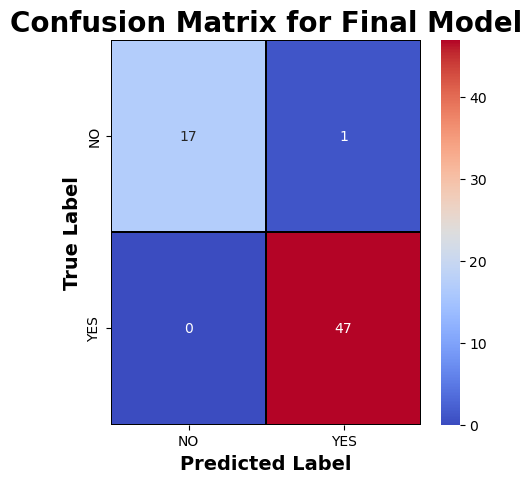

In [59]:
Matrix = confusion_matrix(Y_test, pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="coolwarm", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(rfc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, final_model.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

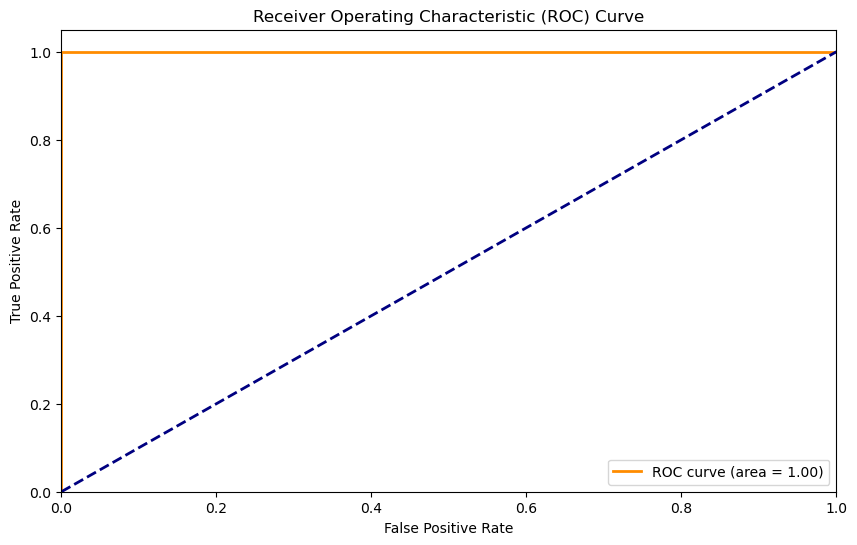

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted probabilities (y_probs) from your model
y_probs = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">SAVING-FINAL MODEL</SPAN>

In [63]:
import joblib
joblib.dump(rfc,'glass_identification_Project.pkl')

['glass_identification_Project.pkl']

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">PREDICTION</SPAN>

In [64]:
prediction = rfc.predict(X_test)


In [65]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
